# Predicting Heart Disease Using Machine Learning

This notebook attempts to create a ML model capable of predicting heart disease based on their medical attributes.

**Our Approach:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

Given clinical parameters about a patient, can we predict wheather or not they have heart disease? 

## 2. Data

The original data came from the Cleveland database from UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

Howevever, we've downloaded it in a formatted way from Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset/data

## 3. Evaluation

We need atleast 95% of Accuracy with this model as its a important domain.

## 4. Features

**Create Data Dictionary**

* age: Displays the age of the individual.
* sex: Displays the gender of the individual using the following format : 1 = male 0 = female
* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic
* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.
* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes
* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.
* exang- Exercise induced angina : 1 = yes 0 = no
* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.
* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart
* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

In [2]:
import sklearn
sklearn.__version__ # will print out the version number

'1.5.2'

## Importing the required libraries

In [3]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy

import pandas as pd # pandas is so commonly used, it's shortened to pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns # seaborn gets shortened to sns, TK - can seaborn be removed for matplotlib (simpler)?

## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-06-30 21:33:42.381338

NumPy version: 2.2.1
pandas version: 2.2.3
matplotlib version: 3.10.0
Scikit-Learn version: 1.5.2


## Load Data

Import our CSV File.

In [4]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

What we do in this part?
* We just become more familier with the data.
* Become an expert on the data set.
* If someone ask questions, you can answer about the data with confidence.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [6]:
# As target is our main attribute we are trying to predict and 
# It can either be 1 or 0 lets find out how many are 1's and how many are 0's
# in the given data.

df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

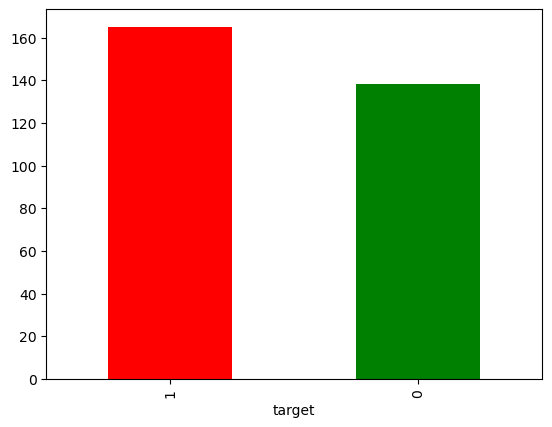

In [7]:
# It's a relatively balanced classification problem
# Lets Visualize this 

df.target.value_counts().plot(kind='bar',color=['red','green']);

In [8]:
# differnt information about our data frame
#df.info() gives you a quick summary of your dataset — 
# things like the number of rows, column names, data types, 
# and how many non-null values each column has. Super useful 
# to spot missing data or check if the data types are what you expect.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Learn more about data by describing it
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target columns with sex columns
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


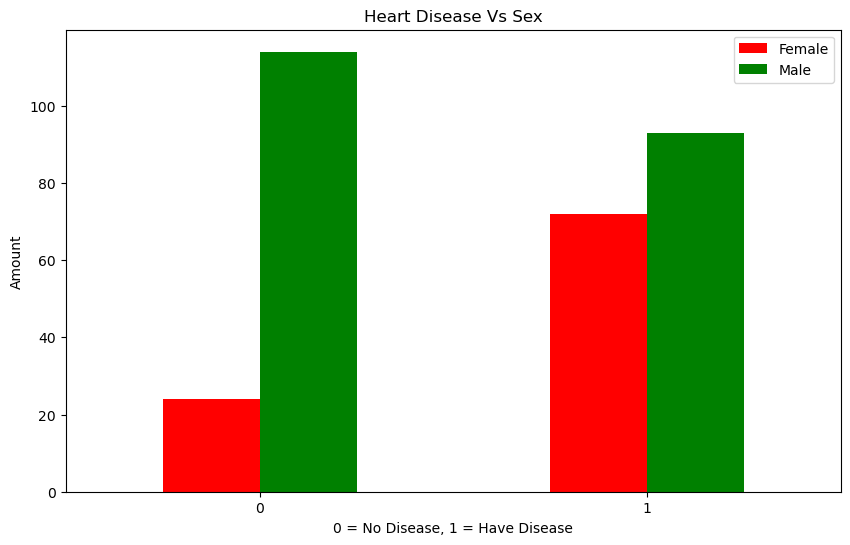

In [13]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6), color=['red','green']);
plt.title("Heart Disease Vs Sex")
plt.xlabel("0 = No Disease, 1 = Have Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

## Age vs Max Heart Rate for Heart Disease



In [14]:
df.thalach.value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

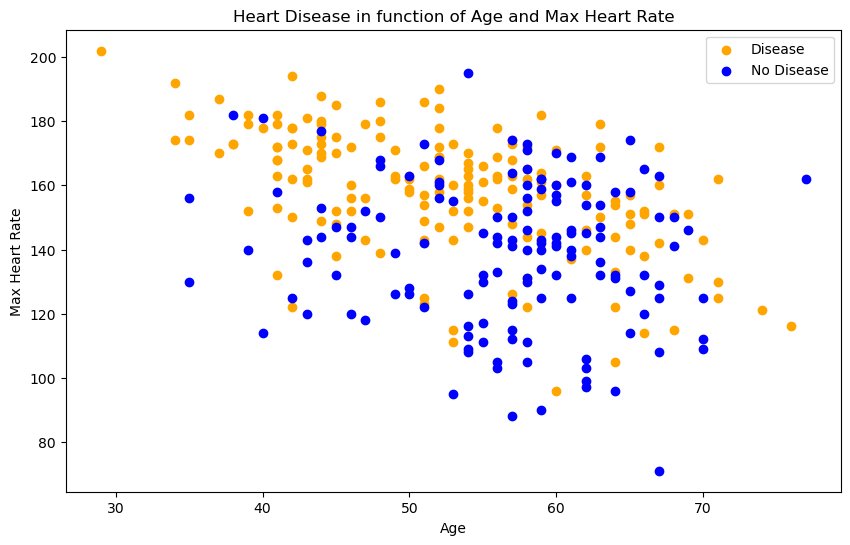

In [15]:
# Create a figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='orange');

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue');

# Add some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

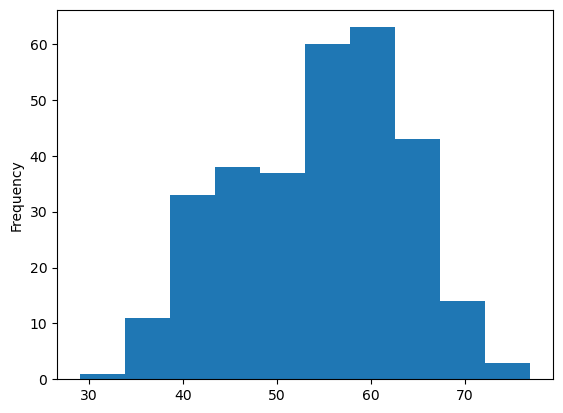

In [16]:
# Lets check the distribution of the age column with a histogram 
df.age.plot.hist();

## Hear Disease Frequency per Chest Pain Type

In [17]:
 pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


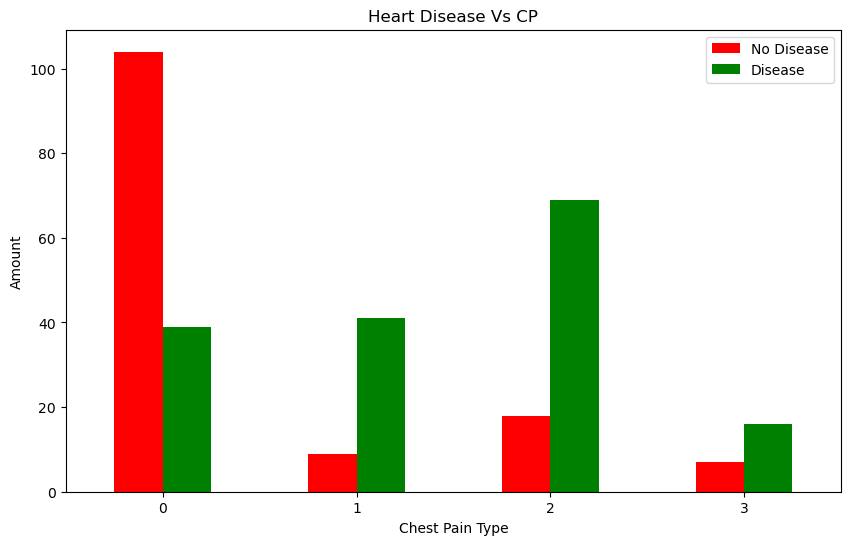

In [18]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6), color=['red','green']);
plt.title("Heart Disease Vs CP")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0);

In [19]:
# Lets make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


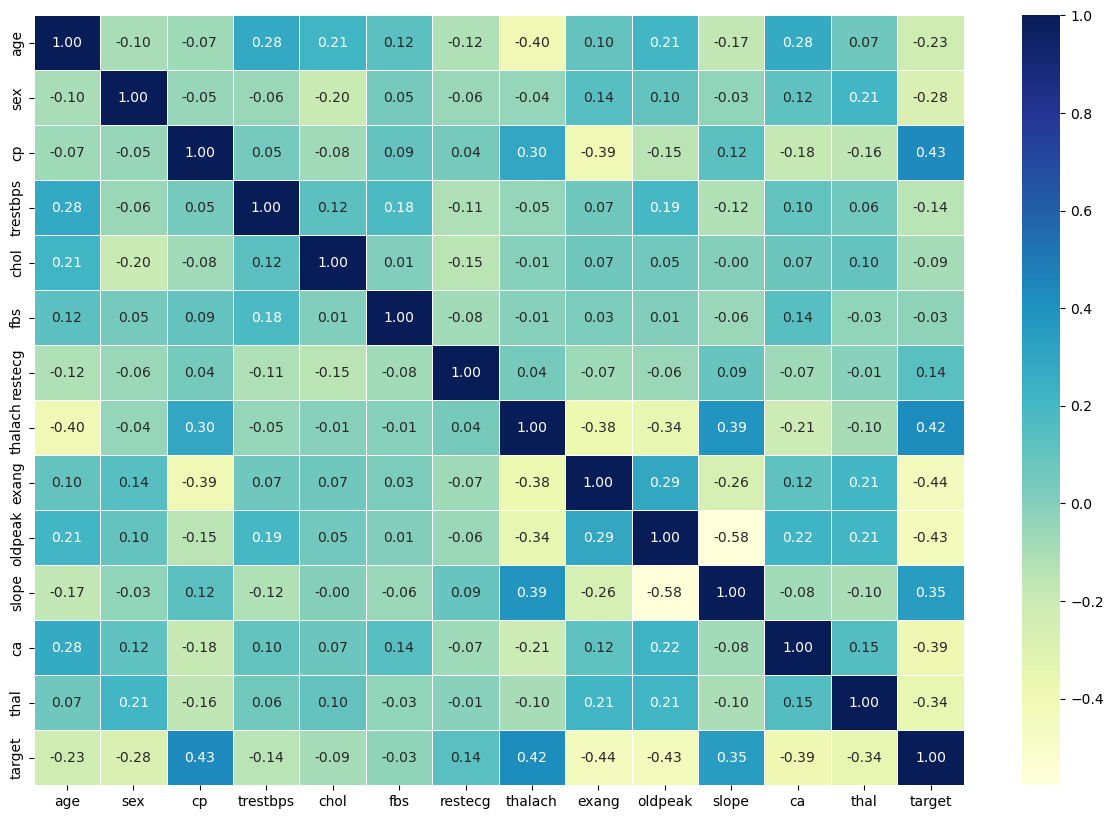

In [20]:
# Lets make this more understandable
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Modelling

In [21]:
# Split Data into X and Y i.e seperate independent variable from dependant variable
X = df.drop("target",axis = 1)
y = df.target

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now as we have train and test sets, its time we build a machine learning model

We will first train our model using training set.

Then we will test it on our test set.

We will be trying 3 different models:

1.Logistic Regression

2.K-Nearest Neighbours Classifier

3.Random Forest Classifier

In [27]:
# Put models in a disctionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42)
    model_scores = {}
    #loop models
    for name,model in models.items():
        # fir the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
        

In [28]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

/home/dontkillme/miniconda3/envs/heart_disease_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Coparison

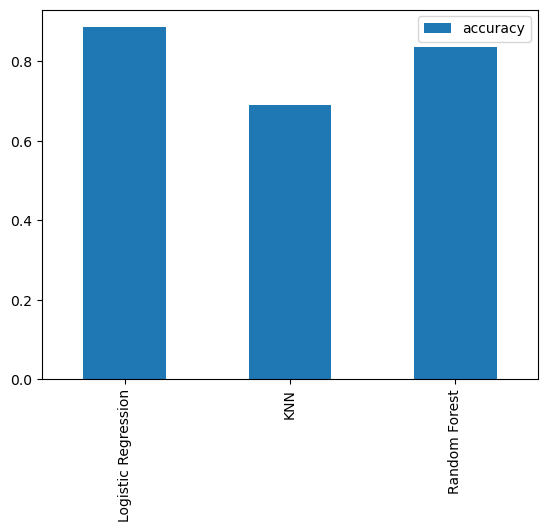

In [29]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

## Hyperparameter tuning 

## KNN - 1st

In [30]:
train_scores = []
test_scores = []

# try different number of n_neighbours
neighbours = range(1,21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train,y_train))

    test_scores.append(knn.score(X_test,y_test))


In [31]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Score on Test Data 75.40983606557377 %


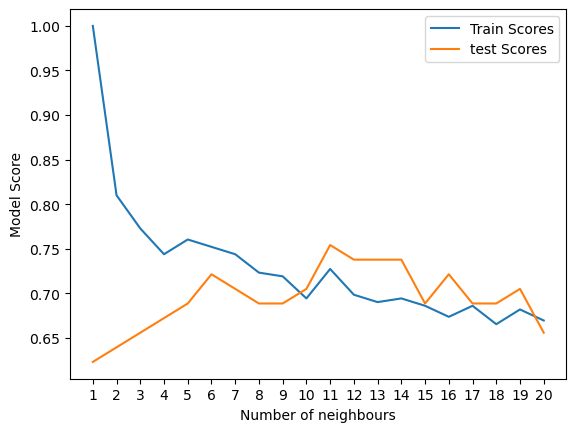

In [33]:
plt.plot(neighbours,train_scores, label="Train Scores")
plt.plot(neighbours,test_scores, label="test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print("Maximum Score on Test Data", max(test_scores) * 100,"%")

## Hyperparameter tuning using RandomizedSearchCV
* Logisticregression()
* RandomForestClassifier()

In [34]:
# Create Hyperparameter grid for logisticregression
logistic_grid = {
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]}

# Tuning Logistic regression
np.random.seed(42)

# setup random hyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=logistic_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [36]:
 rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [37]:
# Create Hyperparameter grid for randomforestclassifier
randomforst_grid = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth":[None, 3, 5, 10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

np.random.seed(42)

# setup random hyperparameter search for randomforstclassifier
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    randomforst_grid,
    cv=5,
    n_iter = 20,
    verbose=True
)

# Fit random hyperparameter search model for randomforestclassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [39]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV


In [40]:
# Creating new grid for Hyperparamater tuning using grid search for logisticRegression model

log_reg_grid = {
    "C": np.logspace(-4,4,30),
    "solver":['liblinear']
}

# setup grid hyperparameter for logisticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# fit our grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569415), 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our ML model: ROC, AUC, Confusion Matrix, Classification Report, Precision, Recall, F1 score

In [44]:
# Make Prediction with tuned model and save it

y_preds = gs_log_reg.predict(X_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

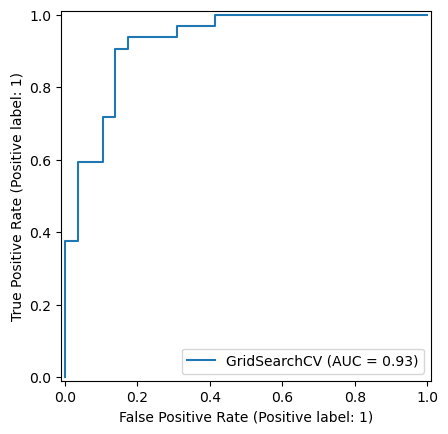

In [47]:
# plot ROC curve and calculate AUC metric

RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

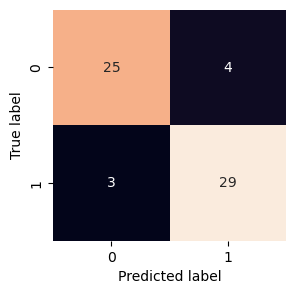

In [48]:
# Confusion Matrix

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [50]:
# Lets get a classification report as well as cross validated precision, recall and f1-socre

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

In [51]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569415), 'solver': 'liblinear'}

In [61]:
# Create a new classifier with best params
clf = LogisticRegression(C=gs_log_reg.best_params_['C'], solver=gs_log_reg.best_params_['solver'])

In [62]:
# Lets create a function to calculate the corss-validated metrics
def calculate_metrics(metric):
    cv_metric = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring = metric)

    cv_metric_mean = np.mean(cv_metric)
    return cv_metric_mean, cv_metric

In [64]:
# Cross Validated Accuracy
cv_accuracy_mean, cv_metric = calculate_metrics("accuracy")
cv_metric, cv_accuracy_mean 

(array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ]),
 np.float64(0.8446994535519124))

In [65]:
# Cross Validated Precision
cv_precision_mean, cv_presion = calculate_metrics("precision")
cv_presion, cv_precision_mean

(array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ]),
 np.float64(0.8207936507936507))

In [66]:
# Cross Validated Recall
cv_recall_mean, cv_recall = calculate_metrics("recall")
cv_recall, cv_recall_mean

(array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788]),
 np.float64(0.9212121212121213))

In [67]:
# Cross Validated f1-score
cv_f1_mean, cv_f1 = calculate_metrics("f1")
cv_f1, cv_f1_mean

(array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055]),
 np.float64(0.8673007976269721))

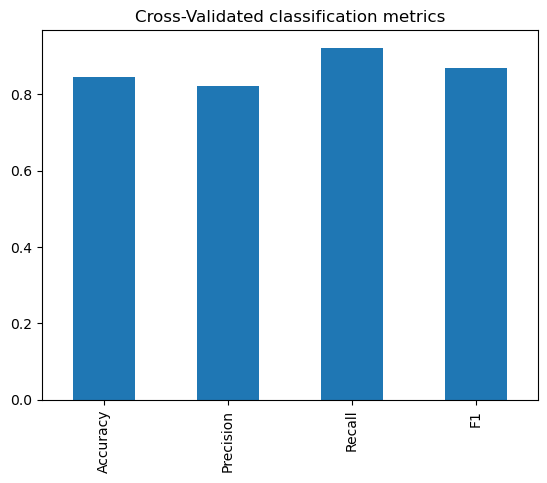

In [71]:
# Plot a bar graph

cv_metrics = pd.DataFrame(
    {
        "Accuracy": cv_accuracy_mean,
        "Precision": cv_precision_mean,
        "Recall": cv_recall_mean,
        "F1": cv_f1_mean
    },
    index=[0]
)

cv_metrics.T.plot.bar(title = "Cross-Validated classification metrics",
                      legend=False);

## Feature Importance

In [72]:
# Fit an instance of LegesticRegression
clf = LogisticRegression(C=gs_log_reg.best_params_['C'], solver=gs_log_reg.best_params_['solver'])

clf.fit(X_train,y_train)

LogisticRegression(C=np.float64(0.20433597178569415), solver='liblinear')

In [73]:
clf.coef_

array([[ 0.00316728, -0.86044676,  0.6606703 , -0.01156993, -0.00166374,
         0.043861  ,  0.31275867,  0.02459362, -0.60413095, -0.56862788,
         0.45051632, -0.63609908, -0.67663375]])

In [74]:
# make a feature dict for above data to make sense

feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': np.float64(0.0031672831490428734),
 'sex': np.float64(-0.8604467611033929),
 'cp': np.float64(0.6606703033765812),
 'trestbps': np.float64(-0.011569932573406874),
 'chol': np.float64(-0.0016637446227845127),
 'fbs': np.float64(0.04386100300331059),
 'restecg': np.float64(0.3127586663860777),
 'thalach': np.float64(0.024593615040090857),
 'exang': np.float64(-0.6041309542130907),
 'oldpeak': np.float64(-0.568627878652957),
 'slope': np.float64(0.45051632493382815),
 'ca': np.float64(-0.6360990849570495),
 'thal': np.float64(-0.6766337455114415)}

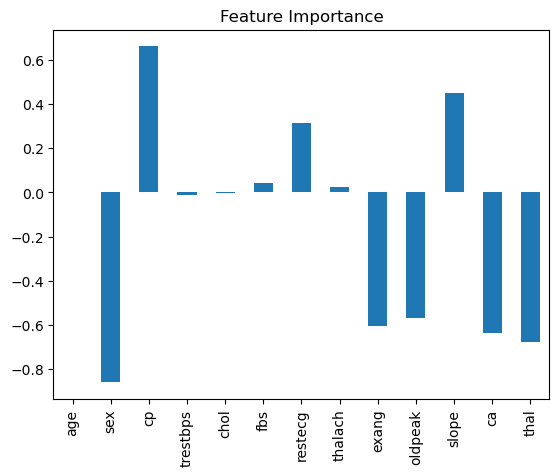

In [78]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.T.plot.bar(title = "Feature Importance",
                      legend = False);